In [1]:
import pytumblr
import pandas as pd
import re
import random
from tqdm import tqdm_notebook as tqdm
import pickle
import os

# OAuth

with open('../../oauth.txt') as f:
    lines = f.read().splitlines()
    
client = pytumblr.TumblrRestClient(lines[0], lines[1], lines[2], lines[3])

# Try to get profile images

In [4]:
# Load selected blog names

# fpath = '/usr2/mamille2/tumblr/data/sample1k/blognames.txt'
# with open(os.path.join(fpath), 'r') as f:
#     blognames = f.read().splitlines()

fpath = '/usr0/home/mamille2/new_home/tumblr/icwsm2020/icwsm2020_blogs_1m.csv'
# with open(fpath) as f:
#     data = f.read().replace('\0', '')
#     blog_info = pd.read_csv(data, escapechar='\\', engine='python')
blog_info = pd.read_csv(fpath, escapechar='\\', engine='python', encoding='utf8', error_bad_lines=False)
blognames = blog_info['tumblr_blog_name'].tolist()
len(blognames)

Skipping line 119458: Expected 14 fields in line 119458, saw 27
Skipping line 148688: Expected 14 fields in line 148688, saw 27
Skipping line 156335: Expected 14 fields in line 156335, saw 27
Skipping line 230847: Expected 14 fields in line 230847, saw 27
Skipping line 242074: Expected 14 fields in line 242074, saw 27
Skipping line 307609: Expected 14 fields in line 307609, saw 27
Skipping line 360570: Expected 14 fields in line 360570, saw 27
Skipping line 379222: Expected 14 fields in line 379222, saw 27
Skipping line 384288: Expected 14 fields in line 384288, saw 27
Skipping line 472072: Expected 14 fields in line 472072, saw 27
Skipping line 472845: Expected 14 fields in line 472845, saw 27
Skipping line 479855: Expected 14 fields in line 479855, saw 27
Skipping line 503662: Expected 14 fields in line 503662, saw 27
Skipping line 539319: Expected 14 fields in line 539319, saw 27
Skipping line 554024: Expected 14 fields in line 554024, saw 27
Skipping line 662068: Expected 14 fields

1000624

In [5]:
# Random sample of 500 unique blog names, weighted by probability in data
# import random

# selection = set()

# while len(selection) < 1000:
#     choice = random.choice(blognames)
#     if not choice in selection:
#         selection.add(choice)
        
# len(selection)

# Random selection of 500 blognames (if already unique)
num_lines = 1000000
selection = [b for b in blognames if isinstance(b, str)][:1000000]
# selection = random.sample([b for b in blognames if isinstance(b, str)], 1000)
len(selection)

999951

In [13]:
import urllib.request
from tqdm import tqdm_notebook as tqdm

# blogname = 'david'

count_successful = 0
max_num = 1000
blognames_with_default_images = []
blognames_with_images = []

pbar = tqdm(total=max_num)
# for blogname in tqdm(selection, total=2*max_num):
for blogname in selection:
    
    if count_successful >= max_num:
        break
    
    response = client.avatar(blogname, size=512)
    
    # Check for rate limit exceedance
    if 'errors' in response:
        if 'title' in response['errors'][0]:
            if 'Limit Exceeded' in response['errors'][0]['title']:
                print("limit exceeded")
                break
        
    if 'avatar_url' in response:
        count_successful += 1
        pbar.update(1)
        avatar_url = response['avatar_url']
        
        if avatar_url.startswith('https://assets.tumblr.com/images/default_avatar/'):
            blognames_with_default_images.append(blogname)
        else:    
            blognames_with_images.append(blogname)
            r = urllib.request.urlopen(avatar_url).read()
    #         with open(f'/usr2/mamille2/tumblr/data/avatars/random_sample500/{blogname}.png', 'wb') as f:
            with open(f'/usr0/home/mamille2/new_home/tumblr/icwsm2020/nondefault_sample1000/{count_successful:03}.png', 'wb') as f:
                f.write(r)
                
count_successful

limit exceeded


0

In [11]:
response

{'meta': {'status': 429, 'msg': 'Limit Exceeded'},
 'response': [],
 'errors': [{'title': 'Limit Exceeded',
   'code': 0,
   'detail': 'Hit a glitch. Try again.'}]}

In [18]:
len(blognames_with_default_images)

61

In [ ]:
# Add in profile image info to blog info df

In [11]:
response

{'avatar_url': 'https://assets.tumblr.com/images/default_avatar/octahedron_closed_512.png'}

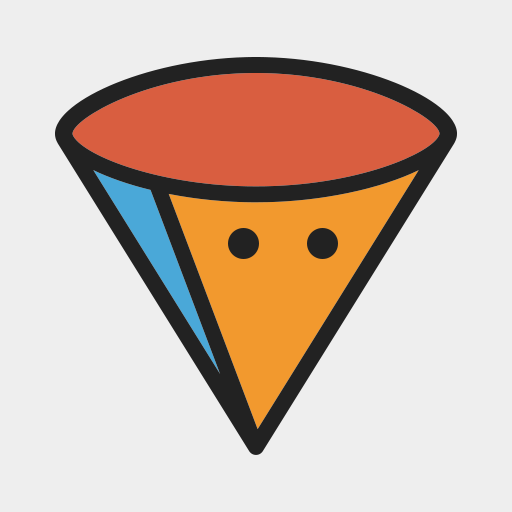

In [7]:
from IPython.display import Image, display

display(Image('/usr2/mamille2/tumblr/data/avatars/test.png'))

# 1-time

In [4]:
fpath = '/usr0/home/mamille2/new_home/tumblr/icwsm2020/icwsm2020_blogs_1m.csv'
with open(fpath) as f:
    data = f.read()
    
# '\0' in data

with open(fpath, 'w') as f:
    f.write(data.replace('\0', ' '))

# Assemble blog descriptions

In [10]:
data_dirpath = '../../data/blog_descriptions/'

descs = []

for fname in sorted(os.listdir(data_dirpath)):
    print(fname, end='\t')
    fpath = os.path.join(data_dirpath, fname)
    
    with open(fpath, 'rb') as f:
        d = pickle.load(f)
        print(len(d))
        
    descs.extend(d)
    
len(descs)

a_blog_desc01000.pkl	919
blog_desc01000.pkl	920
blog_desc_unsorted02000.pkl	278
blog_desc_unsorted03000.pkl	915
blog_desc_unsorted04000.pkl	915


3947

# Sample user ids

In [ ]:
# Write out usernames

datapath = '../../data/halfday_text_usernames.pkl'
data = pd.read_pickle(datapath)

In [16]:
usernames = sorted(set([name for name in data['username'] if isinstance(name, str)]))
len(usernames)

77572

In [17]:
with open('../../data/halfday_text_usernames.txt', 'w') as f:
    for name in usernames:
        if name:
            f.write(name + '\n')

In [6]:

data = pd.read_pickle(datapath)
data.columns

Index(['post_id', 'activity_time_epoch', 'tumblog_id', 'post_title',
       'post_short_url', 'post_type', 'post_caption', 'post_format',
       'post_note_count', 'created_time_epoch', 'updated_time_epoch',
       'is_submission', 'source_title', 'source_url', 'post_classifier',
       'blog_classifier', 'accepts_answers', 'reblogged_from_post_id',
       'reblogged_from_metadata', 'root_post_id', 'body', 'mentions',
       'post_tags', 'restrictedtags_200freq'],
      dtype='object')

In [9]:
data['source_url']

0                                                        NaN
1          http://thisbeautifulmelody.tumblr.com/post/127...
2          http://zoiekravitz.tumblr.com/post/26012912538...
3                                                        NaN
4                                                        NaN
5                                                        NaN
6                                                        NaN
7                                                        NaN
8          http://imagineyouricon.tumblr.com/post/4972798...
9                                                        NaN
10                        http://braddocksgirl14.tumblr.com/
11                                                       NaN
12                                                       NaN
13         http://perchu.tumblr.com/post/61024362215/fini...
14                                                       NaN
15                                                       NaN
16                      

In [35]:
p = extract_username(data.loc[8, 'source_url'])
p

'imagineyouricon'

In [43]:
data['username'] = data['source_url'].map(extract_username)
data['username']

0                         None
1          thisbeautifulmelody
2                  zoiekravitz
3                         None
4                         None
5                         None
6                         None
7                         None
8              imagineyouricon
9                         None
10             braddocksgirl14
11                        None
12                        None
13                      perchu
14                        None
15                        None
16                        None
17                        None
18             obsessive-ninja
19                        None
20                butt-requiem
21                        None
22                        None
23                        None
24                        None
25                        None
26                        None
27             deanprincesster
28                        None
29                        None
                  ...         
3078612                   None
3078613 

In [44]:
data.to_pickle('../../data/halfday_text_usernames.pkl')

In [45]:
usernames = data['username'].unique()
len(usernames)

77573

In [49]:
u1k = random.sample(list(usernames), 1000)
len(u1k)

1000

In [57]:
u10k = random.sample(list(usernames), 10000)
len(u10k)

10000

In [15]:
[u for u in data['source_url'] if (isinstance(u, str) and u.startswith('https://'))]

['https://askku-chan.tumblr.com/post/100773635251/those-eyes-she-had-no-idea-what-colour-they-were',
 'https://askku-chan.tumblr.com/post/100673104371/pxrtinglass-skomentowała-twój-postdo-i',
 'https://askku-chan.tumblr.com/post/105801252731/pxrtinglass-skomentowała-twój-postattaches-a',
 'https://askku-chan.tumblr.com/post/105806043481/pxrtinglass-skomentowała-twój-postmew-dear',
 'https://askku-chan.tumblr.com/post/106056057476/pxrtinglass-skomentowała-twój-postmew',
 'https://askku-chan.tumblr.com/post/109983318976/pxrtinglass-skomentowała-twój-postcasually',
 'https://askku-chan.tumblr.com/post/109983318976/pxrtinglass-skomentowała-twój-postcasually',
 'https://askku-chan.tumblr.com/post/123197769846/pxrtinglass-skomentowała-twój-postdelicately',
 'https://askku-chan.tumblr.com/post/125602836911/pxrtinglass-skomentowała-twój-postmew-luv',
 'https://allisonfedder.tumblr.com',
 'https://dumbshitwhocares.tumblr.com/post/49150690209/i-get-caught-off-guard-when-people-acknowledge-my',
 

In [41]:
u_p = re.compile(r'https?:\/\/(.*?)\.', re.IGNORECASE)

In [42]:
def extract_username(url):
    if isinstance(url, str):
        m = re.match(u_p, url)
        if not m:
            print(url)
        else:
            return m.group(1)
    
    else:
        return None

# Querying blog descriptions

In [60]:
desc = {}

# for name in ['otherkinfashionunder20', 'other-otherkin', 'kiramii']:
for name in tqdm(u1k[:100]):
    info = client.blog_info(name)
    if 'blog' in info:
        desc[name] = info['blog']['description']
    
print(len(desc))

outpath = '../../blog_descriptions.pkl'

with open(outpath, 'wb') as f:
    pickle.dump(list(desc.values()), f)
    
print("Wrote blog descriptions to {}".format(outpath))


87
Wrote blog descriptions to ../../blog_descriptions.pkl


# Querying tags (terf)

In [4]:
posts = client.tagged('terf', filter='text')

In [6]:
[posts[i]['body'] for i in range(20)]

KeyError: 'body'